In [1]:
# import hashlib
# import hmac
# import json
# import requests
# import time

# def generate_signature(params):
#     message = requests.compat.urlencode(params)
#     signature = hmac.new(API_SECRET, message.encode('utf-8'), hashlib.sha256)
#     return signature.hexdigest()

# def call_api(method, path, params=None):
#     if params is None:
#         params = {}
#     params['timestamp'] = int(time.time() * 1000)
#     params['recvWindow'] = 5000
#     # params['api_key'] = API_KEY
#     params['signature'] = generate_signature(params)
#     response = requests.request(method, path, params=params)
#     return json.loads(response.text)


# def get_recent_btc_price():
#     response = call_api('GET', 'https://api.binance.com/api/v3/trades', {'symbol': 'BTCUSDT', 'limit': 1})
#     return float(response[0]['price'])
# get_recent_btc_price()

# 모든 가상화폐 정보

## 공통함수

In [2]:
import requests
import json
import pandas as pd


def my_get_json(url, save_file=False):
    response = requests.get(url)
    df = pd.DataFrame(json.loads(response.text))
    if bool(save_file):
        df.to_csv("./실습03_bitcoin_info.csv", index=False)
    print(f"총 : {df.shape[0]}")
    return df

In [3]:
info_df = my_get_json("https://api.upbit.com/v1/market/all", True)
info_df.head()

총 : 298


market korean_name      english_name
0  KRW-BTC        비트코인           Bitcoin
1  KRW-ETH        이더리움          Ethereum
2  BTC-ETH        이더리움          Ethereum
3  BTC-XRP          리플            Ripple
4  BTC-ETC     이더리움클래식  Ethereum Classic

## investing
* 거래량 순위 
* https://kr.investing.com/crypto/currencies
* https://chromedriver.chromium.org/downloads

In [4]:
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver

#---------------------------------------------- 크롬 옵션 객체 생성
# options = webdriver.ChromeOptions()
# options.add_argument("window-size=1000x800") # 화면크기(전체화면)
# user_agent = "Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36 "
# options.add_argument('user-agent=' + user_agent)
# options.add_argument('headless') # headless 모드 설정
# options.add_argument("disable-gpu")
# options.add_argument("disable-infobars")
# options.add_argument("--disable-extensions")
# options.add_argument("--mute-audio") #mute
# options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
# options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
# options.add_argument("--start-maximized")
# driver = webdriver.Chrome('./chromedriver_102.0.5005.27.exe', options=options)

#---------------------------------------------- 크롬 드라이버 로드  110.0.5481.177
# https://chromedriver.chromium.org/downloads
# https://chromedriver.storage.googleapis.com/index.html?path=112.0.5615.49/
# ----------------------------------------------
driver = webdriver.Chrome('chromedriver_112.exe')
driver.get("https://kr.investing.com/crypto/currencies")

htmlstr = driver.page_source
soup = BeautifulSoup(htmlstr, features="html.parser")
table = soup.find("table")
df = pd.read_html(str(table))[0]
df = df.iloc[:, 2:]
df

C:\Users\ASIA\AppData\Local\Temp\ipykernel_3656\73944892.py:25: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver_112.exe')


종목    기호       가격 (KRW)      총 시가  거래량(24H)   총 거래량 변동(24H)  \
0          비트코인   BTC   28092.200000  ₩720.41T   ₩17.74T  39.87%  -2.86%   
1          이더리움   ETH    1856.690000  ₩295.99T   ₩10.81T  24.30%  -2.39%   
2        Tether  USDT    1323.099800  ₩108.61T   ₩30.38T  68.29%  -0.02%   
3           BNB   BNB  418690.910000   ₩65.38T  ₩649.79B   1.46%  -2.04%   
4      USD Coin  USDC       0.998800   ₩40.15T    ₩4.21T   9.47%  +0.03%   
..          ...   ...            ...       ...       ...     ...     ...   
95    THORChain  RUNE    1637.029000  ₩533.81B   ₩19.26B   0.04%  -4.62%   
96     Loopring   LRC     387.892580  ₩518.75B   ₩23.45B   0.05%  -7.65%   
97      Zilliqa   ZIL      32.109018  ₩512.26B   ₩35.81B   0.08%  -7.35%   
98  PancakeSwap  CAKE    2530.194000  ₩511.73B   ₩79.20B   0.18%  -9.29%   
99         Nexo  NEXO     913.908600  ₩510.85B    ₩7.01B   0.02%  -3.60%   

     변동(7D)  
0    -1.65%  
1    +0.68%  
2    +0.09%  
3    -4.94%  
4        0%  
..      ...  
95   -6.23%  
96  -12.22%  
97  -11.38%  
98  -26.75%  
99   -1.56%  

[100 rows x 8 columns]

In [15]:
# df['총 시가'] = df['총 시가'].str.replace('₩', '$')
# df['거래량(24H)'] = df['거래량(24H)'].str.replace('₩', '$')
# df.head()

In [16]:
df["총 거래량2"] = df["총 거래량"].str.extract(r'([0-9.]+)').astype('float')
df.head()

종목    기호     가격 (KRW)      총 시가  거래량(24H)   총 거래량 변동(24H)  변동(7D)  \
0      비트코인   BTC   28092.2000  ₩720.41T   ₩17.74T  39.87%  -2.86%  -1.65%   
1      이더리움   ETH    1856.6900  ₩295.99T   ₩10.81T  24.30%  -2.39%  +0.68%   
2    Tether  USDT    1323.0998  ₩108.61T   ₩30.38T  68.29%  -0.02%  +0.09%   
3       BNB   BNB  418690.9100   ₩65.38T  ₩649.79B   1.46%  -2.04%  -4.94%   
4  USD Coin  USDC       0.9988   ₩40.15T    ₩4.21T   9.47%  +0.03%      0%   

   총 거래량2  
0   39.87  
1   24.30  
2   68.29  
3    1.46  
4    9.47

In [17]:
df.sort_values("총 거래량2", ascending=False).head(20)

종목     기호       가격 (KRW)      총 시가  거래량(24H)   총 거래량  변동(24H)  \
2         Tether   USDT    1323.099800  ₩108.61T   ₩30.38T  68.29%   -0.02%   
0           비트코인    BTC   28092.200000  ₩720.41T   ₩17.74T  39.87%   -2.86%   
1           이더리움    ETH    1856.690000  ₩295.99T   ₩10.81T  24.30%   -2.39%   
4       USD Coin   USDC       0.998800   ₩40.15T    ₩4.21T   9.47%   +0.03%   
12   Binance USD   BUSD       0.999300    ₩7.88T    ₩2.84T   6.39%       0%   
28       TrueUSD   TUSD    1319.003900    ₩2.93T    ₩1.27T   2.85%   -0.04%   
51          Pepe   PEPE       0.000002    ₩1.20T    ₩1.19T   2.67%  -10.12%   
5            XRP    XRP       0.437010   ₩30.00T    ₩1.05T   2.36%   -4.50%   
3            BNB    BNB  418690.910000   ₩65.38T  ₩649.79B   1.46%   -2.04%   
13         라이트코인    LTC  107245.863000    ₩7.86T  ₩611.73B   1.38%   -2.90%   
9         Solana    SOL      21.180000   ₩11.08T  ₩568.66B   1.28%   -3.77%   
69         Bloom    SUI    1494.201600  ₩791.72B  ₩490.72B   1.10%       0%   
8        Polygon  MATIC       0.928000   ₩11.40T  ₩485.79B   1.09%   -4.97%   
37      Arbitrum    ARB       1.164500    ₩1.97T  ₩467.03B   1.05%   -6.26%   
7       Dogecoin   DOGE      98.377633   ₩13.74T  ₩367.81B   0.83%   -3.21%   
6        Cardano    ADA     484.502400   ₩16.93T  ₩296.06B   0.67%   -3.71%   
11          TRON    TRX       0.068670    ₩8.22T  ₩254.45B   0.57%   -2.03%   
45        Stacks    STX     966.494400    ₩1.33T  ₩239.38B   0.54%   +4.47%   
18     Chainlink   LINK    8799.530000    ₩4.56T  ₩233.04B   0.52%   -3.77%   
63  Render Token   RNDR    2499.805000  ₩917.41B  ₩218.05B   0.49%   -7.66%   

      변동(7D)  총 거래량2  
2     +0.09%   68.29  
0     -1.65%   39.87  
1     +0.68%   24.30  
4         0%    9.47  
12    +0.05%    6.39  
28    -0.53%    2.85  
51  +127.56%    2.67  
5     -5.82%    2.36  
3     -4.94%    1.46  
13    -6.83%    1.38  
9     -4.93%    1.28  
69   -74.90%    1.10  
8     -5.23%    1.09  
37   -13.44%    1.05  
7     -5.53%    0.83  
6     -5.91%    0.67  
11    +0.57%    0.57  
45    +6.33%    0.54  
18    -4.59%    0.52  
63   -19.38%    0.49

# 크롤링을 사용해 ohlcv 가져오기

<table><thead>
<tr>
<th>Parameter</th>
<th>Description</th>
</tr>
</thead><tbody>
<tr>
<td>market</td>
<td>마켓명</td>
</tr>
<tr>
<td>candle_date_time_utc</td>
<td>캔들 기준 시각(UTC 기준)</td>
</tr>
<tr>
<td>candle_date_time_kst</td>
<td>캔들 기준 시각(KST 기준)</td>
</tr>
<tr>
<td>opening_price</td>
<td>시가</td>
</tr>
<tr>
<td>high_price</td>
<td>고가</td>
</tr>
<tr>
<td>low_price</td>
<td>저가</td>
</tr>
<tr>
<td>trade_price</td>
<td>종가</td>
</tr>
<tr>
<td>timestamp</td>
<td>해당 캔들에서 마지막 틱이 저장된 시각</td>
</tr>
<tr>
<td>candle_acc_trade_price</td>
<td>누적 거래 금액</td>
</tr>
<tr>
<td>candle_acc_trade_volume</td>
<td>누적 거래량</td>
</tr>
<tr>
<td>prev_closing_price</td>
<td>이전종가</td>
</tr>
    <tr>
<td>change_price</td>
<td>변동가</td>
</tr>
    <tr>
<td>change_rate</td>
<td>변동률</td>
</tr>
</tbody></table>

In [18]:
ohlcv_df = my_get_json("https://api.upbit.com/v1/candles/days?market=KRW-ETH&count=20")
print(ohlcv_df.columns)
ohlcv_df.head(3)

총 : 20
Index(['market', 'candle_date_time_utc', 'candle_date_time_kst',
       'opening_price', 'high_price', 'low_price', 'trade_price', 'timestamp',
       'candle_acc_trade_price', 'candle_acc_trade_volume',
       'prev_closing_price', 'change_price', 'change_rate'],
      dtype='object')


market candle_date_time_utc candle_date_time_kst  opening_price  \
0  KRW-ETH  2023-05-08T00:00:00  2023-05-08T09:00:00      2510000.0   
1  KRW-ETH  2023-05-07T00:00:00  2023-05-07T09:00:00      2541000.0   
2  KRW-ETH  2023-05-06T00:00:00  2023-05-06T09:00:00      2638000.0   

   high_price  low_price  trade_price      timestamp  candle_acc_trade_price  \
0   2527000.0  2477000.0    2490000.0  1683531979610            2.417470e+10   
1   2576000.0  2509000.0    2510000.0  1683503999746            3.628893e+10   
2   2674000.0  2501000.0    2540000.0  1683417599558            7.067299e+10   

   candle_acc_trade_volume  prev_closing_price  change_price  change_rate  
0              9683.459524           2510000.0      -20000.0    -0.007968  
1             14244.181223           2540000.0      -30000.0    -0.011811  
2             27430.426285           2639000.0      -99000.0    -0.037514

In [19]:
# # ------------------------------------------------------------------
# # FinanceDataReader API 사용해 ohlcv 가져오기
# # ------------------------------------------------------------------
# import FinanceDataReader as fdr
# # BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)
# symbol = 'BTC/KRW'
# start_date = '2022-01-01'
# end_date = '2022-05-03'
# df = fdr.DataReader(symbol, start_date, end_date)
# df.head()

# pyupbit API를 사용해 ohlcv 가져오기

In [20]:
# ! pip install pyupbit

In [21]:
import pyupbit
import pandas as pd

In [22]:
# interval (일: day, 주: week 월: month)
df = pyupbit.get_ohlcv("KRW-ETH", interval="day", count=10)
df.head(3)

open       high        low      close        volume  \
2023-04-29 09:00:00  2524000.0  2554000.0  2515000.0  2541000.0   6967.724243   
2023-04-30 09:00:00  2541000.0  2580000.0  2505000.0  2506000.0  11586.194551   
2023-05-01 09:00:00  2506000.0  2529000.0  2437000.0  2461000.0  15709.552789   

                            value  
2023-04-29 09:00:00  1.764839e+10  
2023-04-30 09:00:00  2.946118e+10  
2023-05-01 09:00:00  3.887454e+10

##  10주 간의 주별 시세

In [23]:
df = pyupbit.get_ohlcv(ticker="KRW-ETH", interval="week", count=10)
df.head()

open       high        low      close  \
2023-03-06 09:00:00  2092000.0  2109000.0  1870000.0  2098000.0   
2023-03-13 09:00:00  2096000.0  2429000.0  2070000.0  2371000.0   
2023-03-20 09:00:00  2371000.0  2436000.0  2280000.0  2354000.0   
2023-03-27 09:00:00  2356000.0  2436000.0  2256000.0  2375000.0   
2023-04-03 09:00:00  2378000.0  2550000.0  2352000.0  2450000.0   

                            volume         value  
2023-03-06 09:00:00  170114.557640  3.397016e+11  
2023-03-13 09:00:00  275211.908763  6.210476e+11  
2023-03-20 09:00:00  174196.640720  4.111662e+11  
2023-03-27 09:00:00  146344.046606  3.459978e+11  
2023-04-03 09:00:00  130508.760050  3.213682e+11

##  1시간 동안 분 별 시세
* 1시간 : interval="minute1" * count=60

In [24]:
df = pyupbit.get_ohlcv(ticker="KRW-ETH", interval="minute1", count=60)
df.head()

open       high        low      close     volume  \
2023-05-08 15:47:00  2496000.0  2497000.0  2495000.0  2495000.0   4.214037   
2023-05-08 15:48:00  2497000.0  2497000.0  2495000.0  2497000.0   3.574557   
2023-05-08 15:49:00  2497000.0  2497000.0  2494000.0  2496000.0   8.423057   
2023-05-08 15:50:00  2496000.0  2496000.0  2495000.0  2495000.0   3.172036   
2023-05-08 15:51:00  2494000.0  2496000.0  2494000.0  2495000.0  11.523418   

                            value  
2023-05-08 15:47:00  1.051708e+07  
2023-05-08 15:48:00  8.923509e+06  
2023-05-08 15:49:00  2.102053e+07  
2023-05-08 15:50:00  7.915536e+06  
2023-05-08 15:51:00  2.874664e+07

## 1시간 동안 3분당 시세
* 1시간 : interval="minute3" * count=20

In [25]:
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="minute3", count=20)
df.head()

open        high         low       close  \
2023-05-08 15:48:00  37795000.0  37827000.0  37742000.0  37770000.0   
2023-05-08 15:51:00  37756000.0  37772000.0  37735000.0  37740000.0   
2023-05-08 15:54:00  37738000.0  37757000.0  37732000.0  37738000.0   
2023-05-08 15:57:00  37747000.0  37813000.0  37738000.0  37798000.0   
2023-05-08 16:00:00  37799000.0  37858000.0  37771000.0  37855000.0   

                        volume         value  
2023-05-08 15:48:00   8.437732  3.188135e+08  
2023-05-08 15:51:00   6.475120  2.444101e+08  
2023-05-08 15:54:00   5.321499  2.008471e+08  
2023-05-08 15:57:00   7.145828  2.698613e+08  
2023-05-08 16:00:00  12.562820  4.750524e+08

## 1시간 : 1분봉
* 1분봉은 제공하지 않음 . 아래와 같이 가공 후 사용

In [26]:
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="minute1", count=60)
df['open']   = df['open'].resample('T').first()
df['high']   = df['high'].resample('T').max()
df['low']    = df['low'].resample('T').min()
df['close']  = df['close'].resample('T').last()
df['volume'] = df['volume'].resample('T').sum()
df = df.dropna()
df.head()

open        high         low       close    volume  \
2023-05-08 15:47:00  37791000.0  37825000.0  37791000.0  37810000.0  0.585007   
2023-05-08 15:48:00  37795000.0  37827000.0  37793000.0  37793000.0  1.134649   
2023-05-08 15:49:00  37792000.0  37799000.0  37781000.0  37781000.0  4.190802   
2023-05-08 15:50:00  37780000.0  37783000.0  37742000.0  37770000.0  3.112281   
2023-05-08 15:51:00  37756000.0  37772000.0  37741000.0  37750000.0  2.046493   

                            value  
2023-05-08 15:47:00  2.211617e+07  
2023-05-08 15:48:00  4.289582e+07  
2023-05-08 15:49:00  1.583804e+08  
2023-05-08 15:50:00  1.175373e+08  
2023-05-08 15:51:00  7.726268e+07

## 5일치 종가의 평균

In [27]:
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="day", count=5)
print(df['close'].mean())
print(df['close'].values)
df.head()

38423000.0
[38580000. 39053000. 38677000. 38143000. 37662000.]


open        high         low       close  \
2023-05-04 09:00:00  38733000.0  39112000.0  38423000.0  38580000.0   
2023-05-05 09:00:00  38599000.0  39359000.0  38520000.0  39053000.0   
2023-05-06 09:00:00  39077000.0  39435000.0  38142000.0  38677000.0   
2023-05-07 09:00:00  38679000.0  38953000.0  38143000.0  38143000.0   
2023-05-08 09:00:00  38152000.0  38369000.0  37500000.0  37662000.0   

                          volume         value  
2023-05-04 09:00:00  4027.302864  1.561235e+11  
2023-05-05 09:00:00  5614.210355  2.186595e+11  
2023-05-06 09:00:00  4471.184936  1.736841e+11  
2023-05-07 09:00:00  2434.477600  9.389919e+10  
2023-05-08 09:00:00  2116.928358  8.021468e+10

## 현재가

In [28]:
price = pyupbit.get_current_price("KRW-BTC")
price

37662000.0

In [29]:
tickers = ["KRW-BTC", "KRW-ETH"]
price = pyupbit.get_current_price(tickers)
price

{'KRW-BTC': 37662000.0, 'KRW-ETH': 2490000.0}

## 12시간 동안의 종가와 거래량
* 12시간 : interval="minute60", count=12

In [30]:
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="minute60", count=12)
price = pyupbit.get_current_price("KRW-BTC")

print(f"Now price is: {price}")
df[["close", "volume"]].head()


Now price is: 37662000.0


close      volume
2023-05-08 05:00:00  38579000.0   35.497450
2023-05-08 06:00:00  38484000.0   62.081053
2023-05-08 07:00:00  38460000.0   75.616402
2023-05-08 08:00:00  38143000.0  290.015988
2023-05-08 09:00:00  38240000.0  262.980018

## 변동가 , 변동률

In [31]:
df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="minute3", count=20)
df['chg_price'] = df['close'].diff()
df['chg_rate'] = df['close'].pct_change() 
df['chg_rate%'] = df['close'].pct_change() * 100
df.head()

open        high         low       close  \
2023-05-08 15:48:00  37795000.0  37827000.0  37742000.0  37770000.0   
2023-05-08 15:51:00  37756000.0  37772000.0  37735000.0  37740000.0   
2023-05-08 15:54:00  37738000.0  37757000.0  37732000.0  37738000.0   
2023-05-08 15:57:00  37747000.0  37813000.0  37738000.0  37798000.0   
2023-05-08 16:00:00  37799000.0  37858000.0  37771000.0  37855000.0   

                        volume         value  chg_price  chg_rate  chg_rate%  
2023-05-08 15:48:00   8.437732  3.188135e+08        NaN       NaN        NaN  
2023-05-08 15:51:00   6.475120  2.444101e+08   -30000.0 -0.000794  -0.079428  
2023-05-08 15:54:00   5.321499  2.008471e+08    -2000.0 -0.000053  -0.005299  
2023-05-08 15:57:00   7.145828  2.698613e+08    60000.0  0.001590   0.158991  
2023-05-08 16:00:00  12.562820  4.750524e+08    57000.0  0.001508   0.150802

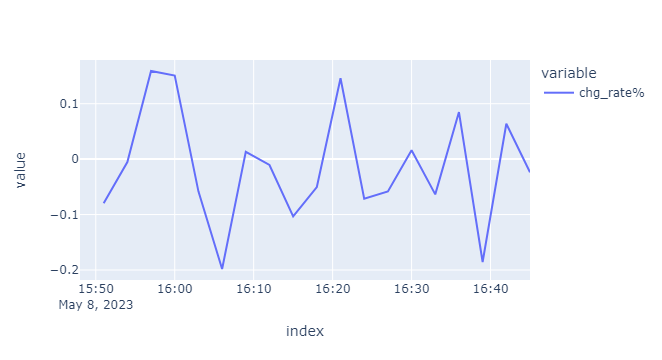

In [32]:
import pandas as pd
pd.options.plotting.backend = "plotly"    

df['chg_rate%'].plot()

## 호가 
<pre>
{'market': 'KRW-BTC',
 'timestamp': 1683165194819,
 'total_ask_size': 9.670441120000001,
 'total_bid_size': 2.68595598,
 'orderbook_units': [{'ask_price': 38814000.0,
   'bid_price': 38803000.0,
   'ask_size': 0.26294398,
   'bid_size': 0.00124307},

In [33]:
orderbooks = pyupbit.get_orderbook('KRW-BTC')

# pprint.pprint(orderbooks)
print(f"매도호가 총: {orderbooks['total_ask_size']}")
print(f"매수호가 총: {orderbooks['total_bid_size']}")

hoga_df = pd.DataFrame(orderbooks["orderbook_units"])
hoga_df.columns = ["매도가","매수가","매도수량","매수수량"]
hoga_df[["매도수량","매도가","매수가","매수수량"]]


매도호가 총: 3.9172778799999994
매수호가 총: 1.8252578400000001


매도수량         매도가         매수가      매수수량
0   0.226460  37667000.0  37666000.0  0.119479
1   0.081338  37668000.0  37662000.0  0.093704
2   0.000200  37669000.0  37661000.0  0.016762
3   0.961568  37673000.0  37660000.0  0.425701
4   0.100200  37674000.0  37658000.0  0.043755
5   1.002000  37675000.0  37657000.0  0.004668
6   0.000200  37676000.0  37655000.0  0.090609
7   0.002654  37677000.0  37651000.0  0.176098
8   0.004461  37678000.0  37650000.0  0.348815
9   0.000133  37679000.0  37649000.0  0.006686
10  0.629000  37690000.0  37648000.0  0.408659
11  0.169000  37693000.0  37647000.0  0.001334
12  0.015220  37694000.0  37646000.0  0.087612
13  0.722051  37696000.0  37645000.0  0.000966
14  0.002793  37698000.0  37644000.0  0.000408

# pyupbit API를 사용해 매수/매도

## 인증키 txt 저장해서 사용
* <font color=red size=4><b>upbit.com 회원가입 후 API키 발급 후 사용
* <font color=red size=4><b>Open API 키를 발급받으면 새창으로 access, secret키를 보여주는데, 한번 끄면 다시 안보여줌 
* <font color=red size=4><b>메모장에 꼭 복사를 해놓고 새창 닫기

In [34]:
f = open("./실습03_my_api_key.txt")
lines = f.readlines()
MY_API_ACCESS_KEY__ = lines[0].strip()   # access key
MY_API_SECRET_KEY__ = lines[1].strip()   # secret key
f.close()
print(MY_API_ACCESS_KEY__, MY_API_SECRET_KEY__)

dfdfiop15s415456654654 e4tre54d6f56d4f65d4f


## 잔고조회

In [35]:
myapi   = pyupbit.Upbit(MY_API_ACCESS_KEY__, MY_API_SECRET_KEY__)
balance = myapi.get_balance("KRW-ETH")
price   = pyupbit.get_current_price("KRW-ETH")
print(f"보유수량:{balance}  현재가:{price}")
print(f"잔고: {int(round(balance * price, 0))}원\n")

TypeError
보유수량:None  현재가:2490000.0


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

## 지정가 주문

In [ ]:
# 1000원, 10개 매수
upbit.buy_limit_order("KRW-ETH", 1000, 10)

In [ ]:
# 1000원, 10개 매도
upbit.sell_limit_order("KRW-ETH", 1000, 10)

## 시장가 주문

In [ ]:
# 시장가 10개 매수
upbit.buy_market_order("KRW-ETH", 10)

In [ ]:
# 시장가 10개 매도
upbit.sell_market_order("KRW-ETH", 10)

## 주문취소

In [ ]:
uuid = "3e2c6fd3-f70c-4939-8054-686ce6bad2d4"
upbit.cancel_order(uuid)

# 자동매매

## 매매 전략 ( RSI + 다이버전스)

* <font size=4><b>RSI</b></font>
    * 상승한 날의 상승폭 평균 값(AU)에서 전체 변화량(AU + AD) 비율
        * <font color=red><b>$ RSI = RS / (1 + RS)$  또는  $RSI = AU / (AU + AD) $ <p>
    * RSI가 70% 이상이면 과매수 상태, 30% 이하일 때 과매도 상태로 규정
        * <font color=red><b>매매조건 :  RSI가 70% 이상이면 매도, 30% 이하이면 매수</b></font>    
    <pre>
    U(up)                 : 가격이 전일 가격보다 상승한 날의 상승분
    D(down)               : 가격이 전일 가격보다 하락한 날의 하락분
    AU(average ups)       : A의 평균
    AD(average downs)     : D의 평균
    RS(relative strength) : AU를 AD값으로 나눈 것 값(RS 값이 크다==상승폭이 크다)
    </pre>
* <font size=4><b>다이버전스</b></font>
    * 일반 다이버전스 : 전 고점, 저점을 돌파할 때 추세가 전환되었다고 판단
    * 히든 다이버전스 : 전 고점, 저점을 돌파하지 못했을 때 추세가 전환되었다고 판단
    <img width=600 src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK2X9T%2Fbtq73jMfV44%2FTPaHKOrJDbsuV8NU7VEKi0%2Fimg.png">


In [ ]:
# import talib as ta
# ta.RSI(df['close'], timeperiod=14)

In [ ]:
def my_order(coin="KRW-BTC", spend=10000, interval=1, data_size=200):
    
    # 현재 코인 잔액 표시, 출력
    balance  = myapi.get_balance(coin)
    price    = pyupbit.get_current_price(coin)
    print(f"{coin} 잔고: {int(round(balance * price, 0))}원\n")

    # ----------------------------------------------------------------
    # interval 처리
    # ----------------------------------------------------------------
    if interval == 10080:
        timeRange = "week"
    elif interval == 1440:
        timeRange = "day"
    else:
        timeRange = f"minute{interval}"
        
    buy = False
    buyPrice = 0
    while 1:
        # 5분봉 200개 불러오기
        df = pyupbit.get_ohlcv(ticker=coin, interval=timeRange, count=data_size)
        print("\n\n===========데이터을 입력했습니다==============")
        print(df.head())

        # ----------------------------------------------------------------
        # 매수, 매도 결정
        # ----------------------------------------------------------------
        buy_sell_count = 0
        MY_RSI_TIMEPERIOD__ = 14
        rsi = talib.RSI(df['close'], timeperiod=MY_RSI_TIMEPERIOD__)
           
        print(f"RSI: {round(rsi, 1)}%")
        if rsi > 70   and  df["close"][-1] < max(df["close"][-MY_RSI_TIMEPERIOD__:]) and buy == True:
            print("매도")
            buy_sell_count += 1
        elif rsi < 30 and  df["close"][-1] > min(df["close"][-MY_RSI_TIMEPERIOD__:]) and buy == False:
            print("매수")
            buy_sell_count += 1
        else:
            print("----")
        
        # ----------------------------------------------------------------
        # 자동매매
        # ----------------------------------------------------------------
        print("\n")
        if buy_sell_count == 1:
            if myapi.get_balance(coin) > spend:
                if buy == False:
                    buy = True
                    buyPrice = pyupbit.get_current_price(coin)
                    myapi.buy_market_order(coin, spend)
                    print(f"매수: {self.spend}")
                else:
                    buy = False
                    currPrice = pyupbit.get_current_price(coin)
                    if buyPrice == 0:
                        sellPrice = spend
                    else:
                        sellPrice = spend * (buyPrice / currPrice) * (1/0.9995)
                    myapi.sell_market_order(coin, sellPrice / currPrice)
                    print(f"매도: {sellPrice}")
            else:
                print("잔액 부족")
        else:
            print("----")
            
        print(f"{interval}분 후 다시 시작")
        time.sleep(interval * 60)